In [1]:
import pandas as pd

# Load the updated combined CSV file
file_path = 'Updated_Combined_Study1_answers.csv'
df = pd.read_csv(file_path)

In [2]:
# Calculate the accuracy rate per set
df['average_accuracy'] = df[['P1', 'P2', 'P3']].mean(axis=1)
accuracy_rate_per_set = df.groupby('Set_number')['average_accuracy'].mean().reset_index()
accuracy_rate_per_set.columns = ['Set_number', 'Accuracy_Rate']
accuracy_rate_per_set = accuracy_rate_per_set.sort_values(by='Accuracy_Rate')
average_accuracy_per_set = accuracy_rate_per_set['Accuracy_Rate'].mean()


In [3]:
# Calculate the accuracy rate per fallacy type
accuracy_rate_per_fallacy = df.groupby('fallacy_type')['average_accuracy'].mean().reset_index()
accuracy_rate_per_fallacy.columns = ['fallacy_type', 'Accuracy_Rate']
accuracy_rate_per_fallacy = accuracy_rate_per_fallacy.sort_values(by='Accuracy_Rate')
average_accuracy_per_fallacy = accuracy_rate_per_fallacy['Accuracy_Rate'].mean()


In [4]:
# Display the ranked results
print("Ranked Accuracy Rate per Set:")
print(accuracy_rate_per_set)
print(average_accuracy_per_set)

print("\nRanked Accuracy Rate per Fallacy Type:")
print(accuracy_rate_per_fallacy)
print(average_accuracy_per_fallacy)

Ranked Accuracy Rate per Set:
    Set_number  Accuracy_Rate
15          16       0.500000
11          12       0.533333
7            8       0.533333
14          15       0.600000
9           10       0.633333
16          17       0.633333
5            6       0.633333
10          11       0.633333
13          14       0.666667
0            1       0.666667
19          20       0.666667
12          13       0.700000
17          18       0.700000
4            5       0.733333
1            2       0.733333
18          19       0.733333
8            9       0.766667
6            7       0.766667
2            3       0.766667
3            4       0.766667
0.6683333333333332

Ranked Accuracy Rate per Fallacy Type:
              fallacy_type  Accuracy_Rate
13              no fallacy       0.544444
9          false causality       0.625000
12             intentional       0.629630
10           false dilemma       0.636364
1               ad populum       0.666667
5   fallacy of credibility   

In [5]:
# Save the ranked results to CSV files
#accuracy_rate_per_set.to_csv('Set_Accuracy_Rate.csv', index=False)
#accuracy_rate_per_fallacy.to_csv('Fallacy_Accuracy_Rate.csv', index=False)


In [10]:
# Calculate the average response length per fallacy type
df['response_length'] = df['P1_open'].str.len() + df['P2_open'].str.len() + df['P3_open'].str.len()
average_length_per_fallacy = df.groupby('fallacy_type')['response_length'].mean().reset_index()
average_length_per_fallacy.columns = ['fallacy_type', 'Average_Length']
average_length_per_fallacy = average_length_per_fallacy.sort_values(by='Average_Length')

# Merge the accuracy and length data
fallacy_analysis = pd.merge(accuracy_rate_per_fallacy, average_length_per_fallacy, on='fallacy_type')

# Display the ranked results
print("\nRanked Accuracy Rate per Fallacy Type:")
print(accuracy_rate_per_fallacy)
print("\nRanked Average Response Length per Fallacy Type:")
print(average_length_per_fallacy)

# Calculate correlation between accuracy rate and average response length
correlation = fallacy_analysis['Accuracy_Rate'].corr(fallacy_analysis['Average_Length'])
print(f"\nCorrelation between Accuracy Rate and Average Response Length: {correlation}")


Ranked Accuracy Rate per Fallacy Type:
              fallacy_type  Accuracy_Rate
13              no fallacy       0.544444
9          false causality       0.625000
12             intentional       0.629630
10           false dilemma       0.636364
1               ad populum       0.666667
5   fallacy of credibility       0.666667
6     fallacy of extension       0.666667
8     fallacy of relevance       0.666667
3       circular reasoning       0.696970
11   faulty generalization       0.750000
0               ad hominem       0.822222
2        appeal to emotion       0.857143
7         fallacy of logic       0.861111
4             equivocation       0.916667

Ranked Average Response Length per Fallacy Type:
              fallacy_type  Average_Length
11   faulty generalization      209.500000
8     fallacy of relevance      228.545455
0               ad hominem      235.133333
10           false dilemma      235.727273
3       circular reasoning      239.000000
12             intenti

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariakutepova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


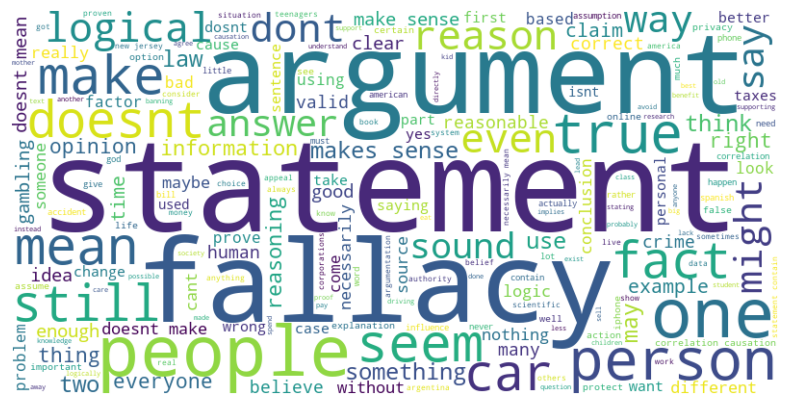

Most Common Words:
statement: 75
fallacy: 52
doesnt: 50
argument: 49
people: 48
one: 46
make: 39
mean: 35
sense: 33
person: 33
would: 32
makes: 32
true: 31
like: 30
even: 29
logical: 28
dont: 28
seems: 26
still: 26
could: 23


In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Download the stopwords from nltk
nltk.download('stopwords')

# Load the updated combined CSV file
file_path = 'Updated_Combined_Study1_answers.csv'
df = pd.read_csv(file_path)

# Combine all open responses into a single text
all_responses = ' '.join(df['P1_open'].fillna('') + ' ' + df['P2_open'].fillna('') + ' ' + df['P3_open'].fillna(''))

# Preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

all_responses = preprocess_text(all_responses)
all_responses = remove_stopwords(all_responses)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_responses)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Perform word frequency analysis
word_counts = Counter(all_responses.split())
most_common_words = word_counts.most_common(20)

# Display the most common words
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariakutepova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


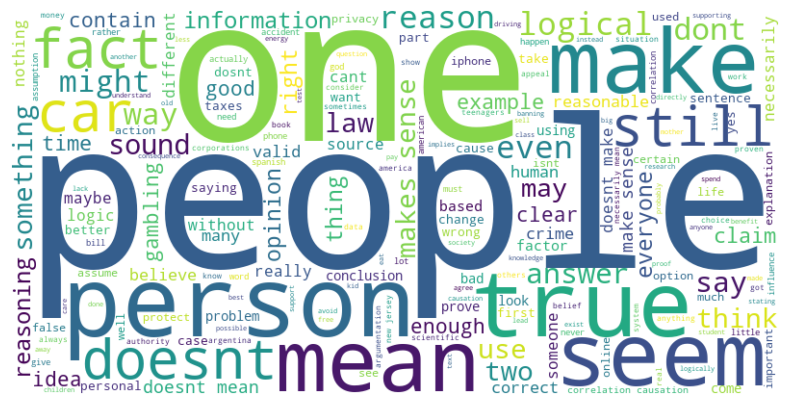

Most Common Words:
doesnt: 50
people: 48
one: 46
make: 39
mean: 35
sense: 33
person: 33
would: 32
makes: 32
true: 31
like: 30
even: 29
logical: 28
dont: 28
seems: 26
still: 26
could: 23
might: 22
answer: 21
also: 20


In [7]:
# Download the stopwords from nltk
nltk.download('stopwords')

# Load the updated combined CSV file
file_path = 'Updated_Combined_Study1_answers.csv'
df = pd.read_csv(file_path)

# Combine all open responses into a single text
all_responses = ' '.join(df['P1_open'].fillna('') + ' ' + df['P2_open'].fillna('') + ' ' + df['P3_open'].fillna(''))

# Preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Remove stop words and specific words
def remove_stopwords(text, extra_stopwords=None):
    stop_words = set(stopwords.words('english'))
    if extra_stopwords:
        stop_words.update(extra_stopwords)
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

extra_stopwords = {'fallacy', 'statement', 'argument'}
all_responses = preprocess_text(all_responses)
all_responses = remove_stopwords(all_responses, extra_stopwords)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_responses)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Perform word frequency analysis
word_counts = Counter(all_responses.split())
most_common_words = word_counts.most_common(20)

# Display the most common words
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


In [8]:
import pandas as pd

# Load the dataset
file_path = 'Updated_Combined_Study1_answers.csv'
df = pd.read_csv(file_path)

# Sample a subset of responses for manual coding
sample_responses = df[['P1_open', 'P2_open', 'P3_open']].sample(50).values.flatten()

# Display sample responses for manual coding
for response in sample_responses:
    print(response)


The response Is a hypocritical fallacy that also is unlogically connected 
to the initial statement. It addresses the person who provided the claim 
instead of the claim itself.
no answer
Different situations, so it doesn’t make sense to compare them
Advancements in research can and have been made without banning 
fossil fuels
Banning does not mean investing in something else
People will always find a way out
make sense
it argues that reducing meat consumption can prevent diseases spread from livestock.
The fallacy is the use of disease from animals being spread to humans. 
The reason is faulty as there are many processes done to the animal in the 
butchering process that makes it clean. There was even an act passed to 
ensure that all meats handled are clean.
Everyone has a little darkness in them better to let it out somewhere safe
“We”? + no concrete source for valid verification
It makes sense.
mom's argument is a slippery slope
The kid is correct that he won't go blind but his eye

In [9]:
from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the open responses
df['P1_sentiment'] = df['P1_open'].apply(lambda x: analyze_sentiment(str(x)))
df['P2_sentiment'] = df['P2_open'].apply(lambda x: analyze_sentiment(str(x)))
df['P3_sentiment'] = df['P3_open'].apply(lambda x: analyze_sentiment(str(x)))

# Calculate average sentiment per set
average_sentiment_per_set = df[['Set_number', 'P1_sentiment', 'P2_sentiment', 'P3_sentiment']].groupby('Set_number').mean().reset_index()

# Display the average sentiment per set
print("Average Sentiment per Set:")
print(average_sentiment_per_set)

# Calculate average sentiment per fallacy type
average_sentiment_per_fallacy = df[['fallacy_type', 'P1_sentiment', 'P2_sentiment', 'P3_sentiment']].groupby('fallacy_type').mean().reset_index()

# Display the average sentiment per fallacy type
print("\nAverage Sentiment per Fallacy Type:")
print(average_sentiment_per_fallacy)


Average Sentiment per Set:
    Set_number  P1_sentiment  P2_sentiment  P3_sentiment
0            1      0.065000      0.170625      0.043750
1            2      0.172652      0.150239      0.052500
2            3      0.124268      0.024375      0.077167
3            4      0.080833      0.054167      0.121943
4            5     -0.035000      0.030179      0.047778
5            6     -0.010000     -0.078269      0.057050
6            7      0.017083     -0.014375      0.022649
7            8      0.013486      0.035357     -0.140833
8            9      0.000437      0.180000     -0.021429
9           10      0.064646      0.047857      0.075155
10          11      0.044598      0.100417      0.142222
11          12      0.036190     -0.121250     -0.063502
12          13      0.073902      0.041673      0.167281
13          14      0.036250      0.047143      0.001339
14          15      0.043750     -0.141667      0.056888
15          16      0.125467      0.030405      0.174583
16  

In [12]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
file_path = 'Updated_Combined_Study1_answers.csv'
df = pd.read_csv(file_path)

# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the open responses
df['P1_sentiment'] = df['P1_open'].apply(lambda x: analyze_sentiment(str(x)))
df['P2_sentiment'] = df['P2_open'].apply(lambda x: analyze_sentiment(str(x)))
df['P3_sentiment'] = df['P3_open'].apply(lambda x: analyze_sentiment(str(x)))

# Combine the sentiment scores into a single column
df['combined_sentiment'] = df[['P1_sentiment', 'P2_sentiment', 'P3_sentiment']].mean(axis=1)

# Calculate average sentiment per fallacy type
average_sentiment_per_fallacy = df.groupby('fallacy_type')['combined_sentiment'].mean().reset_index()
average_sentiment_per_fallacy.columns = ['Fallacy_Type', 'Average_Sentiment']

# Rank the fallacies from most negative to most positive
average_sentiment_per_fallacy = average_sentiment_per_fallacy.sort_values(by='Average_Sentiment')

# Display the ranked average sentiment per fallacy type
print("\nRanked Average Sentiment per Fallacy Type:")
print(average_sentiment_per_fallacy)

# Save the results to a CSV file for further analysis
average_sentiment_per_fallacy.to_csv('Ranked_Average_Sentiment_per_Fallacy_Type.csv', index=False)



Ranked Average Sentiment per Fallacy Type:
              Fallacy_Type  Average_Sentiment
11   faulty generalization          -0.132850
12             intentional          -0.028676
2        appeal to emotion           0.007883
4             equivocation           0.014459
1               ad populum           0.020317
8     fallacy of relevance           0.023703
10           false dilemma           0.028312
9          false causality           0.036312
6     fallacy of extension           0.040619
13              no fallacy           0.057727
0               ad hominem           0.060763
5   fallacy of credibility           0.082680
7         fallacy of logic           0.084096
3       circular reasoning           0.157629


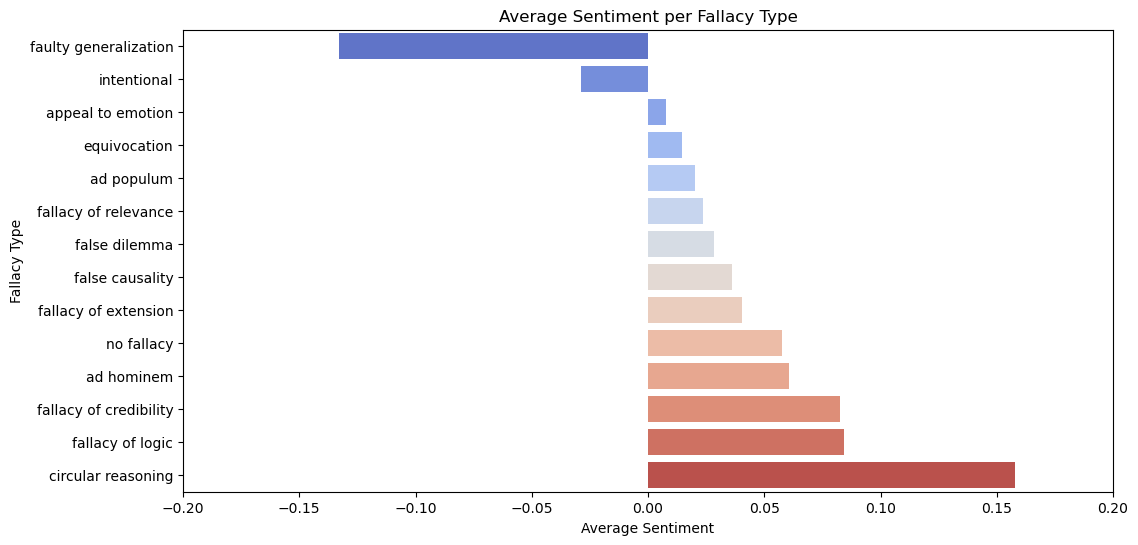

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with average sentiment per fallacy type
file_path = 'Ranked_Average_Sentiment_per_Fallacy_Type.csv'
df = pd.read_csv(file_path)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Average_Sentiment', y='Fallacy_Type', data=df, palette='coolwarm')

# Add labels and title
plt.xlabel('Average Sentiment')
plt.ylabel('Fallacy Type')
plt.title('Average Sentiment per Fallacy Type')
plt.xlim(-0.2, 0.2)  # Adjust x-axis limits based on sentiment range

# Show the plot
plt.show()


In [18]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Calculate sentiment scores for each open response column
df['P1_sentiment'] = df['P1_open'].apply(calculate_sentiment)
df['P2_sentiment'] = df['P2_open'].apply(calculate_sentiment)
df['P3_sentiment'] = df['P3_open'].apply(calculate_sentiment)

# Calculate the average sentiment per row
df['avg_sentiment'] = df[['P1_sentiment', 'P2_sentiment', 'P3_sentiment']].mean(axis=1)

# Group data by 'fallacy_type'
grouped = df.groupby('fallacy_type')

# Calculate mean, standard deviation, and count for each group for the average sentiment
stats = grouped['avg_sentiment'].agg(['mean', 'std', 'count'])

stats_sorted

,mean,std,count
fallacy_type,,,
faulty generalization,-0.132850,0.177638,8
intentional,-0.028676,0.091849,9
appeal to emotion,0.007883,0.084070,7
equivocation,0.014459,0.103201,8
ad populum,0.020317,0.179600,10
fallacy of relevance,0.023703,0.071029,11
false dilemma,0.028312,0.106148,11
false causality,0.036312,0.156298,16
fallacy of extension,0.040619,0.181325,10


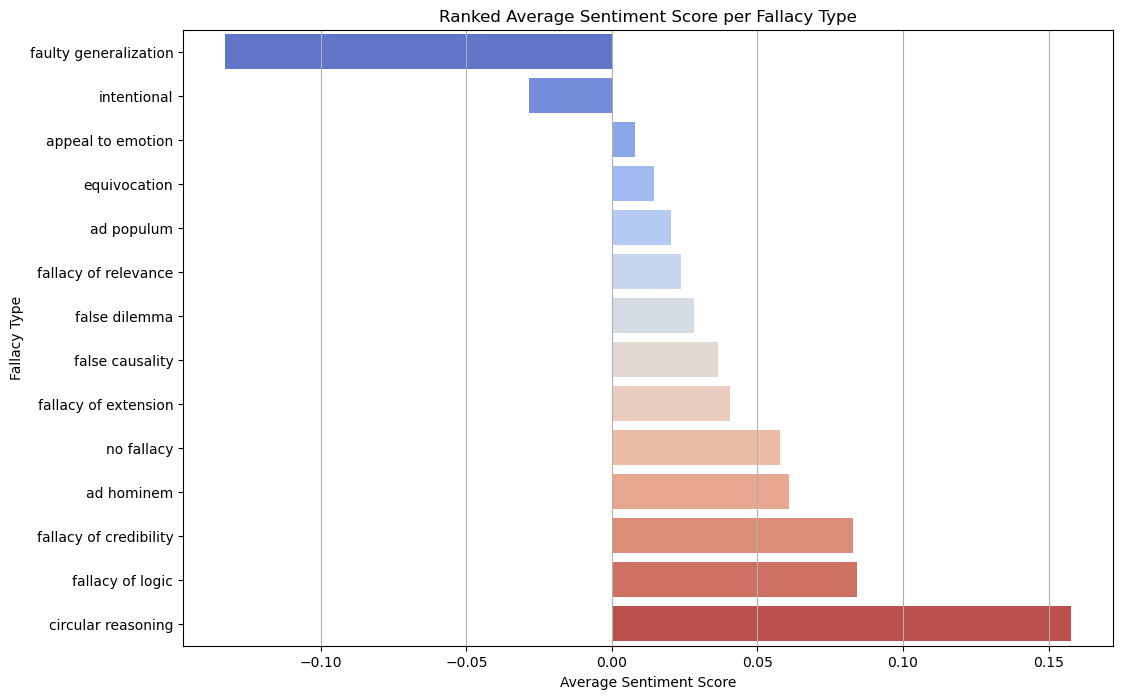

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'stats' is your DataFrame with sentiment scores, standard deviations, and counts
# Sort the stats DataFrame by mean sentiment score in ascending order
stats_sorted = stats.sort_values(by='mean')

# Create a ranked bar plot for mean sentiment scores
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=stats_sorted.index, data=stats_sorted, palette='coolwarm')
plt.title('Ranked Average Sentiment Score per Fallacy Type')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Fallacy Type')
plt.grid(axis='x')

plt.show()
